In [1]:
#Este codigo resolve o conjunto de EDOs do modelo SIR pelo metodo
#de Runge-Kutta de 4 ordem.
#Andre Nepomuceno (junho/2020)

In [2]:
#Modelo SIR
#dS/dt = -beta*S*I = f_R(S,I,t)
#dI/dt =  beta*S*I - gama*I = f_I(S,I,t)
#dR/dt = gama*I = f_R(S,I,t)

In [4]:
#ATENCAO: voce precisara instalar a biblioteca dvipng para matplotlib reconhecer as fontes latex
# sudo apt-get install dvipng
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.lines import Line2D 

In [5]:
#Vamos definir o intervalo de tempo 
N = 100000  #populacao
t_init = 0
t_final = 120 
nsteps = 1200 
h = (t_final-t_init)/nsteps
func = np.zeros(3) #array para guardar os valores de f_S,f_I e f_R
norm = 1e4         #normalizacao para o plot


In [6]:
#Aqui definimos uma funcao para o calculo de f_S,f_I e f_R. 
#A funcao retorna o array 'func' com tres elementos
def F(S,I,beta,gama):
    func[0] = -beta*S*I            #f_S
    func[1] = beta*S*I - gama*I    #f_I
    func[2] = gama*I               #f_R
    return func

In [7]:
#Aqui implementamos o metodo de Runge-Kutta 

def rk4_sir(beta,gama,S0,I0,R0):
    #Valores iniciais
    S = S0
    I = I0
    R = R0
    r0 = beta/gama*S0
    #Vamos definir tres listas vazias, Spoints,Ipoints,Rpoints, para guardar os valores
    #de S(t),I(t) e R(t) em cada iteracao. Ao final, essas lista serão transformadas em Numpy arrays.
    Spoints = []
    Ipoints = []
    Rpoints = []
    for t in np.arange(t_init,t_final+h,h): #nsteps+1 pontos, de zero a t_final
        Spoints.append(S)
        Ipoints.append(I)
        Rpoints.append(R)
        s1 = h*F(S,I,beta,gama)[0]   #retorna h*f_S
        i1 = h*F(S,I,beta,gama)[1]   #retorna h*f_I
        r1 = h*F(S,I,beta,gama)[2]   #retorna h*f_R
        s2 = h*F(S+0.5*s1,I+0.5*i1,beta,gama)[0]
        i2 = h*F(S+0.5*s1,I+0.5*i1,beta,gama)[1]
        r2 = h*F(S+0.5*s1,I+0.5*i1,beta,gama)[2]
        s3 = h*F(S+0.5*s2,I+0.5*i2,beta,gama)[0]
        i3 = h*F(S+0.5*s2,I+0.5*i2,beta,gama)[1]
        r3 = h*F(S+0.5*s2,I+0.5*i2,beta,gama)[2]
        s4 = h*F(S+s3,I+i3,beta,gama)[0]
        i4 = h*F(S+s3,I+i3,beta,gama)[1]
        r4 = h*F(S+s3,I+i3,beta,gama)[2]
        S+= (1/6.)*(s1+2*s2+2*s3+s4)      #S_(n+1) = S_n + (1/6)*(s1+2*s2+2*s3+s4)
        I+= (1/6.)*(i1+2*i2+2*i3+i4)
        R+= (1/6.)*(r1+2*r2+2*r3+r4)
    #Agora vamos transformar as listas em Numpy arrays para plotar a solucao
    Spoints = np.array(Spoints)
    Ipoints = np.array(Ipoints)
    Rpoints = np.array(Rpoints)
    return Spoints, Ipoints, Rpoints,r0

In [8]:
#Chama a funcao rk4_sir para resolver as EDOs
#simulacao para uma populacao de 100k habitantes
S_func1,I_func1,R_func1,r0_1 = rk4_sir(1.0e-5,0.2,N-2,2,0)
S_func2,I_func2,R_func2,r0_2 = rk4_sir(5.0e-6,0.2,N-2,2,0)
S_func3,I_func3,R_func3,r0_3 = rk4_sir(4e-6, 0.2,N-2,2,0)
time = np.linspace(t_init,t_final,nsteps+1)
r0_str1 = r'${:.1f}$'.format(r0_1)
r0_str2 = r'${:.1f}$'.format(r0_2)
r0_str3 = r'${:.1f}$'.format(r0_3)
print(r0_str1)
#Verifique the I_final ~ 0 (para o intervalo de tempo considerado)
print("I_final1 = ",I_func1[nsteps])
print("I_final2 = ",I_func2[nsteps])
print("I_final3 = ",I_func3[nsteps])
time.size == S_func1.size  #deve retornar true

$5.0$
I_final1 =  0.00012974875646182802
I_final2 =  0.3203244272853231
I_final3 =  15.696312851270008


True

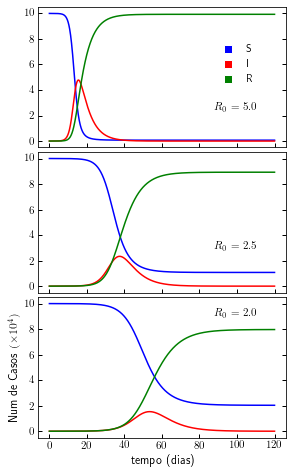

In [9]:
#A maior parte do codigo desta celula visa deixar o grafico apresentavel

plt.rc('text', usetex=True)  #latex style
fig = plt.figure(figsize=(4.3, 6.5))
ax1 = fig.add_axes([0.15, 0.68, 0.8, 0.3],xticklabels=[]) 
ax2 = fig.add_axes([0.15, 0.37, 0.8, 0.3],xticklabels=[])
ax3 = fig.add_axes([0.15, 0.06, 0.8, 0.3])

ax1.tick_params(direction='in', length=4, width=1, grid_alpha=0.5,labelsize=11)
ax2.tick_params(direction='in', length=4, width=1, grid_alpha=0.5,labelsize=11)
ax3.tick_params(direction='in', length=4, width=1, grid_alpha=0.5,labelsize=11)
ax1.yaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax3.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_ticks_position('bottom')
ax3.xaxis.set_ticks_position('bottom')
ax3.set_xlabel("tempo (dias)",fontsize=12)
ax3.set_ylabel(r"Num de Casos $(\times 10^{4})$",fontsize=12)
ax1.plot(time,S_func1/norm,'b',label='S')
ax1.plot(time,I_func1/norm,'r',label='I')
ax1.plot(time,R_func1/norm,'g',label='R')
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
#ax1.legend(loc='upper right',bbox_to_anchor=(0.9, 0.9),frameon=False)
ax1.text(0.71,0.25,r'$R_{0}$ = '+r0_str1, transform=ax1.transAxes,fontsize=11)
ax2.plot(time,S_func2/norm,'b')
ax2.plot(time,I_func2/norm,'r')
ax2.plot(time,R_func2/norm,'g')
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2.text(0.71,0.3,r'$R_{0}$ = '+r0_str2, transform=ax2.transAxes,fontsize=11)
ax3.plot(time,S_func3/norm,'b')
ax3.plot(time,I_func3/norm,'r')
ax3.plot(time,R_func3/norm,'g')
ax3.yaxis.set_major_locator(MaxNLocator(integer=True))
ax3.text(0.71,0.85,r'$R_{0}$ = '+r0_str3, transform=ax3.transAxes,fontsize=11)
#-------------------------------------------------------------
#Esta parte do codigo serve para fazer o marcador da legenda como quadrados, no lugar do padrao reta horizontal
line1 = Line2D(range(1), range(1), color="white", marker='s',markersize=8,markerfacecolor="b")
line2 = Line2D(range(1), range(1), color="white", marker='s',markersize=8,markerfacecolor="r")
line3 = Line2D(range(1), range(1), color="white", marker='s',markersize=8,markerfacecolor="g")
ax1.legend((line1,line2,line3),('S','I','R'),numpoints=1,loc='upper right',bbox_to_anchor=(0.9, 0.8),frameon=False)

In [10]:
#teste de consistencia
#Como o numero N é fixo, devemos ter em qualquer instante N = S(t) + I(t) + R(t)
N = S_func1[0] + I_func1[0] + R_func1[0]
epsilon = 1e-9
for j in range(nsteps+1):
     diff = N - (S_func1[j] + I_func1[j] + R_func1[j])
     if (diff > epsilon):
        print("Warning: Valor de epsilon = ",diff)
        break
     if (j==nsteps):
        print("Calculo consistente :)")

Calculo consistente :)


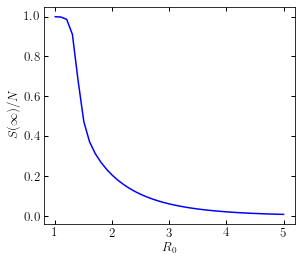

In [11]:
#Vamos verificar o numero de individuos suscetiveis no fim da epidemia S(inf), em funcao de 
#r_0
S_final = []
r0_points = []
for b in np.arange(0.2,1.02,0.02):
    b = b*1e-5
    S_func,_,_,r0 = rk4_sir(b,0.2,99998,2,0)
    S_final.append(S_func[nsteps]/N)
    r0_points.append(r0)
#    print(r0," ",S_func[nsteps]/N)
fig = plt.figure("fig2",figsize=(4.5,4))
ax = plt.axes()
ax.tick_params(direction='in', length=4, width=1, grid_alpha=0.5,labelsize=13)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.set_xlabel(r"$R_{0}$",fontsize=13)
ax.set_ylabel(r"$S(\infty)/N$",fontsize=13)
ax.plot(r0_points,S_final,'b')